In [2]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

In [54]:
data = pd.read_csv("league_of_legends_data_large.csv")

In [55]:
data.head(5)

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [56]:
X, y =  data.drop(['win'], axis=1), data.loc[:,['win']]

In [57]:
print(X.iloc[0])
print("------------------")
print(y.iloc[0])

kills              16
deaths              6
assists            19
gold_earned     17088
cs                231
wards_placed       11
wards_killed        7
damage_dealt    15367
Name: 0, dtype: int64
------------------
win    0
Name: 0, dtype: int64


In [71]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [60]:
print(y_test.shape)
print(y_train.shape)

(200, 1)
(800, 1)


In [72]:
# Convert to tensor
X_train_tens = torch.tensor(X_train_sc, dtype=torch.float32)
X_test_tens = torch.tensor(X_test_sc, dtype=torch.float32)

y_train_tens = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
y_test_tens = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train_tens, y_train_tens)
test_dataset = TensorDataset(X_test_tens, y_test_tens)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x


model = LogisticRegressionModel(X_train.shape[1])

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [74]:
def model_trainer(model, epochs, optimizer, criterion):

    for epoch in range(1, epochs + 1):
        model.train()
        for X, y in train_loader:
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

        if epoch % 100 == 0:
            print(f"[Epoch {epoch}] Train Loss: {loss.item():.4f}")

def evaluate(model, loader, name="Test"):
    model.eval()
    total = 0
    loss_total = 0
    acc = 0.0
    with torch.no_grad():
        for X, y in loader:
            outputs = model(X).detach()
            loss_total += criterion(outputs, y).item() * X.size(0)
            total += y.numel()
            
    acc += ((outputs > 0.5).float() == y).float().mean()
    avg_loss = loss_total / total
    print(f"{name} Accuracy: {acc:.4f}, Loss: {avg_loss:.4f}")

In [75]:
model_trainer(model, 1000, optimizer, criterion)

[Epoch 100] Train Loss: 0.6747
[Epoch 200] Train Loss: 0.6798
[Epoch 300] Train Loss: 0.6867
[Epoch 400] Train Loss: 0.6963
[Epoch 500] Train Loss: 0.6843
[Epoch 600] Train Loss: 0.7245
[Epoch 700] Train Loss: 0.6592
[Epoch 800] Train Loss: 0.7095
[Epoch 900] Train Loss: 0.6924
[Epoch 1000] Train Loss: 0.6742


In [53]:
evaluate(model, train_loader, name="Train")
evaluate(model, test_loader, name="Test")

Train Accuracy: 0.3750, Loss: 0.6903
Test Accuracy: 0.8750, Loss: 0.6829


In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
model_trainer(model, 1000, optimizer, criterion)
evaluate(model, train_loader, name="Train")
evaluate(model, test_loader, name="Test")

[Epoch 100] Train Loss: 0.6906
[Epoch 200] Train Loss: 0.6907
[Epoch 300] Train Loss: 0.6906
[Epoch 400] Train Loss: 0.6906
[Epoch 500] Train Loss: 0.6906
[Epoch 600] Train Loss: 0.6907
[Epoch 700] Train Loss: 0.6907
[Epoch 800] Train Loss: 0.6907
[Epoch 900] Train Loss: 0.6907
[Epoch 1000] Train Loss: 0.6906
Train Accuracy: 0.5225, Loss: 0.6903
Test Accuracy: 0.5400, Loss: 0.6833


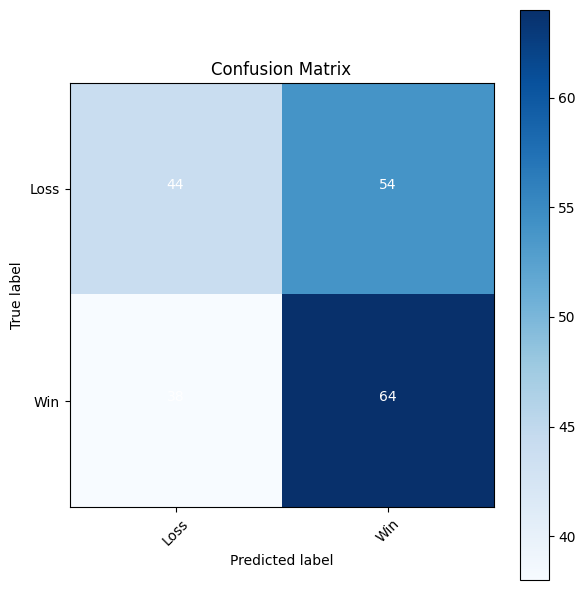

Classification Report:
               precision    recall  f1-score   support

        Loss       0.54      0.45      0.49        98
         Win       0.54      0.63      0.58       102

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



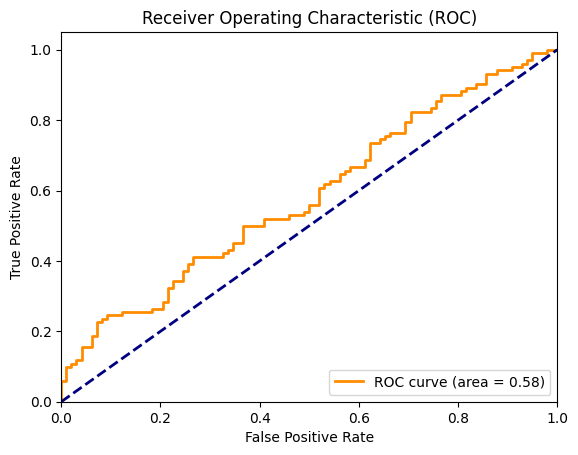

In [ ]:

# Visualize the confusion matrix
#Change the variable names as used in your code

y_pred_test = model(X_test)

y_pred_test_np = y_pred_test.detach().numpy()
y_pred_test_labels = (y_pred_test_np > 0.5).astype(int)

y_test_np = y_test.detach().numpy().astype(int)
cm = confusion_matrix(y_test_np, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig("confusion_matrix.png")

# Print classification report
print("Classification Report:\n", classification_report(y_test_np, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_test_np)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
plt.savefig

In [ ]:
# Save the model
torch.save
torch.save(model.state_dict(), "LR_model.pth")
# Load the model
model = LogisticRegressionModel(input_dim=8)
model.load_state_dict(torch.load('LR_model.pth'))
model.eval()
# Evaluate the loaded model
evaluate(model, test_loader, name="Test")

Test Accuracy: 0.5400, Loss: 0.6833


In [ ]:
# Hyperparameter tuning

def hyper_param_tuner(epochs=50, criterion=criterion, LRs=[0.001, 0.01, 0.05, 0.1]):

    best_lr = 0
    best_acc = 0
    acc = 0

    for lr in LRs:
        model = LogisticRegressionModel(8)
        model.load_state_dict(torch.load('LR_model.pth'))
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        for epoch in range(1, epochs + 1):
            model.train()
            running_loss = 0
            for X, y in train_loader:
                optimizer.zero_grad()
                outputs = model(X)
                loss = criterion(outputs, y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * X.size(0)  # summert loss

        acc = running_loss / len(train_dataset)
        if acc < best_acc or best_acc == 0:
            best_acc = acc
            best_lr = lr
    print(f"Best LR: {best_lr:.3f} with Loss: {best_acc:.4f}")


In [21]:
hyper_param_tuner()

LR=0.100 --> Loss=0.6937
LR=0.050 --> Loss=0.6937
LR=0.010 --> Loss=0.6937
LR=0.001 --> Loss=0.6937


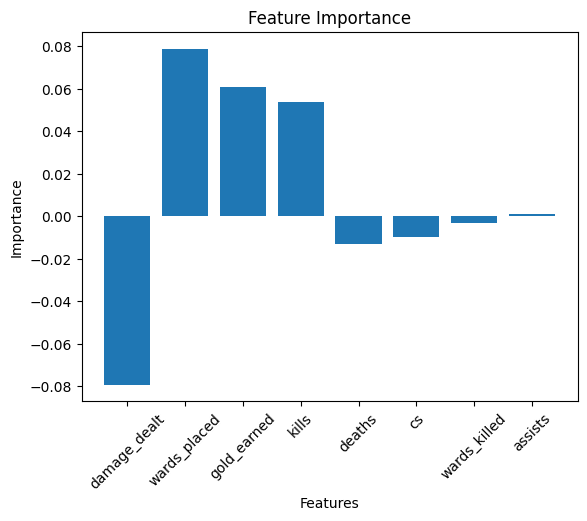

In [ ]:


# Extract the weights of the linear layer
FI = model.linear.weight.data.numpy().flatten()
feature_names = X.columns
df = pd.DataFrame({'Feature': feature_names,
                'learned_weights': FI
                })
df = df.reindex(df.learned_weights.abs().sort_values(ascending=False).index)
# Create a DataFrame for feature importance
df.head(5)
## Write your code here
plt.bar(df.Feature, df.learned_weights)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
plt.savefig("feature_importance.png")